In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
# Loading the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target Variable

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Scaling the features for supervised model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Train Support Vector Machine (SVM) Classifier on Iris 
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)

SVC()

In [9]:
# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [10]:
# Train Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)
# Evaluating Iris by above different classifier for difference between the performances

RandomForestClassifier()

In [11]:
# Function to evaluate and print metrics
def evaluate_classification_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print("Confusion Matrix:\n", cm)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)

In [12]:
print("Support Vector Machine (SVM) Classifier:")
evaluate_classification_model(svm_classifier, X_test_scaled, y_test)

Support Vector Machine (SVM) Classifier:
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [13]:
print("Support Vector Machine (SVM) Classifier:")
evaluate_classification_model(svm_classifier, X_test_scaled, y_test)

Support Vector Machine (SVM) Classifier:
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [14]:
print("Random Forest Classifier:")
evaluate_classification_model(rf_classifier, X_test_scaled, y_test)

Random Forest Classifier:
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [15]:
# Evaluate models on the training set
print("Training Set Evaluation:")
evaluate_classification_model(svm_classifier, X_train_scaled, y_train)
evaluate_classification_model(dt_classifier, X_train_scaled, y_train)
evaluate_classification_model(rf_classifier, X_train_scaled, y_train)

Training Set Evaluation:
Confusion Matrix:
 [[40  0  0]
 [ 0 38  3]
 [ 0  1 38]]
Accuracy: 0.9666666666666667
Precision: 0.9674588284344383
Recall: 0.9666666666666667
Confusion Matrix:
 [[40  0  0]
 [ 0 41  0]
 [ 0  0 39]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[40  0  0]
 [ 0 41  0]
 [ 0  0 39]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [16]:
from sklearn.model_selection import cross_val_score

svm_model_cv = SVC(kernel='linear')

In [22]:
svm_cv_scores = cross_val_score(svm_model_cv, X_train, y_train, cv=5)

In [23]:
svm_model_cv.fit(X_train, y_train)

SVC(kernel='linear')

In [25]:
svm_cv_accuracy = np.mean(svm_cv_scores)

In [27]:
print("SVM Cross-Validation Accuracy:", svm_cv_accuracy)

SVM Cross-Validation Accuracy: 0.9583333333333334


In [28]:
svm_test_accuracy = accuracy_score(y_test, svm_model_cv.predict(X_test))

In [29]:
print("SVM Test Accuracy (After Cross-Validation):", svm_test_accuracy)

SVM Test Accuracy (After Cross-Validation): 1.0


In [18]:
# # Cross-validation for SVM
# svm_cv_scores = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')
# print("Cross-Validation Scores (SVM):", svm_cv_scores)

Cross-Validation Scores (SVM): [0.95833333 1.         0.83333333 1.         0.95833333]


In [19]:
# Use K-means clustering to identify clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

C:\Users\l-js\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\l-js\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [20]:
# Evaluate clustering using accuracy (Note: This is for demonstration, not standard for clustering evaluation)
cluster_labels = kmeans.labels_
accuracy = accuracy_score(y, cluster_labels)
print("Clustering Accuracy:", accuracy)

Clustering Accuracy: 0.24


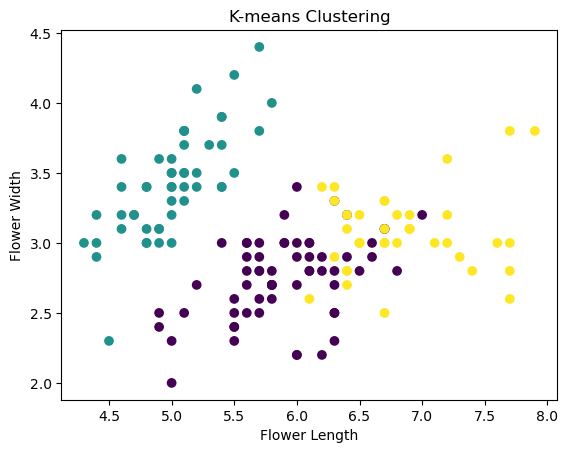

In [21]:
# Plot clustering results
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.title("K-means Clustering")
plt.xlabel("Flower Length")
plt.ylabel("Flower Width")
plt.show()

In [31]:
import matplotlib.pyplot as plt
# Number of cross-validation folds
cv_folds = 5
cv_scores = []

In [32]:
C_values = [0.1, 1, 10, 100, 1000]
for C in C_values:
    svm_model_cv = SVC(kernel='linear', C=C)
    scores = cross_val_score(svm_model_cv, X_train, y_train, cv=cv_folds)
    cv_scores.append(np.mean(scores))

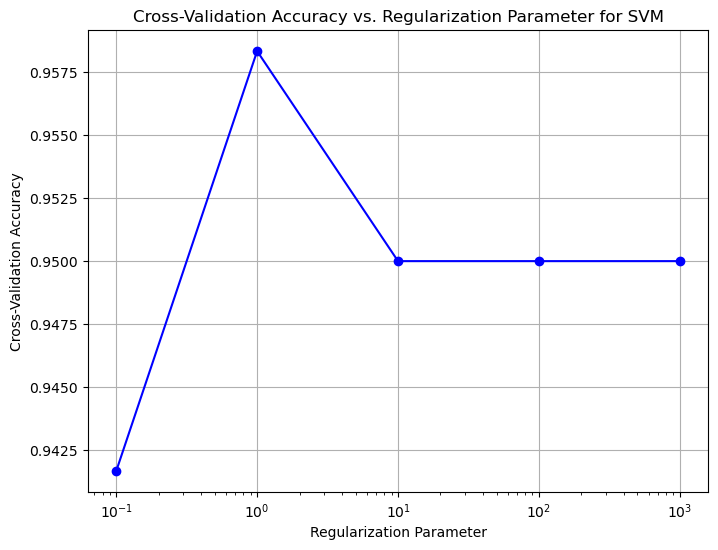

In [34]:
# Plot cross-validation accuracy vs. C values
plt.figure(figsize=(8, 6))
plt.plot(C_values, cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Accuracy vs. Regularization Parameter for SVM')
plt.xlabel('Regularization Parameter')
plt.ylabel('Cross-Validation Accuracy')
plt.xscale('log')
plt.grid(True)
plt.show()

In [35]:
best_C = C_values[np.argmax(cv_scores)]
print("Best C value:", best_C)

Best C value: 1


In [36]:
best_svm_model = SVC(kernel='linear', C=best_C)
best_svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [37]:
best_svm_test_accuracy = accuracy_score(y_test, best_svm_model.predict(X_test))
print("Best SVM Test Accuracy (After Cross-Validation):", best_svm_test_accuracy)

Best SVM Test Accuracy (After Cross-Validation): 1.0
